<a href="https://colab.research.google.com/github/samindika97/Computer-Vision-Projects/blob/main/Clustering/K_means_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using Sklearn


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


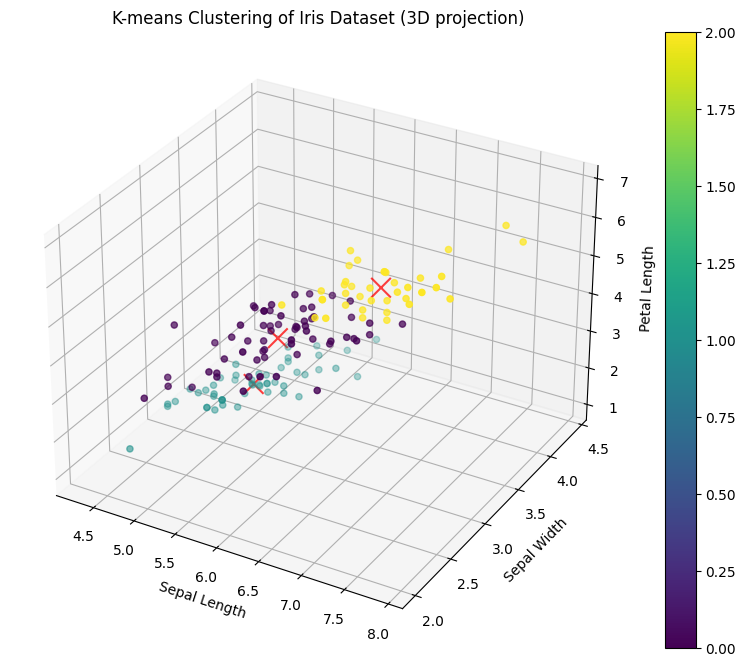

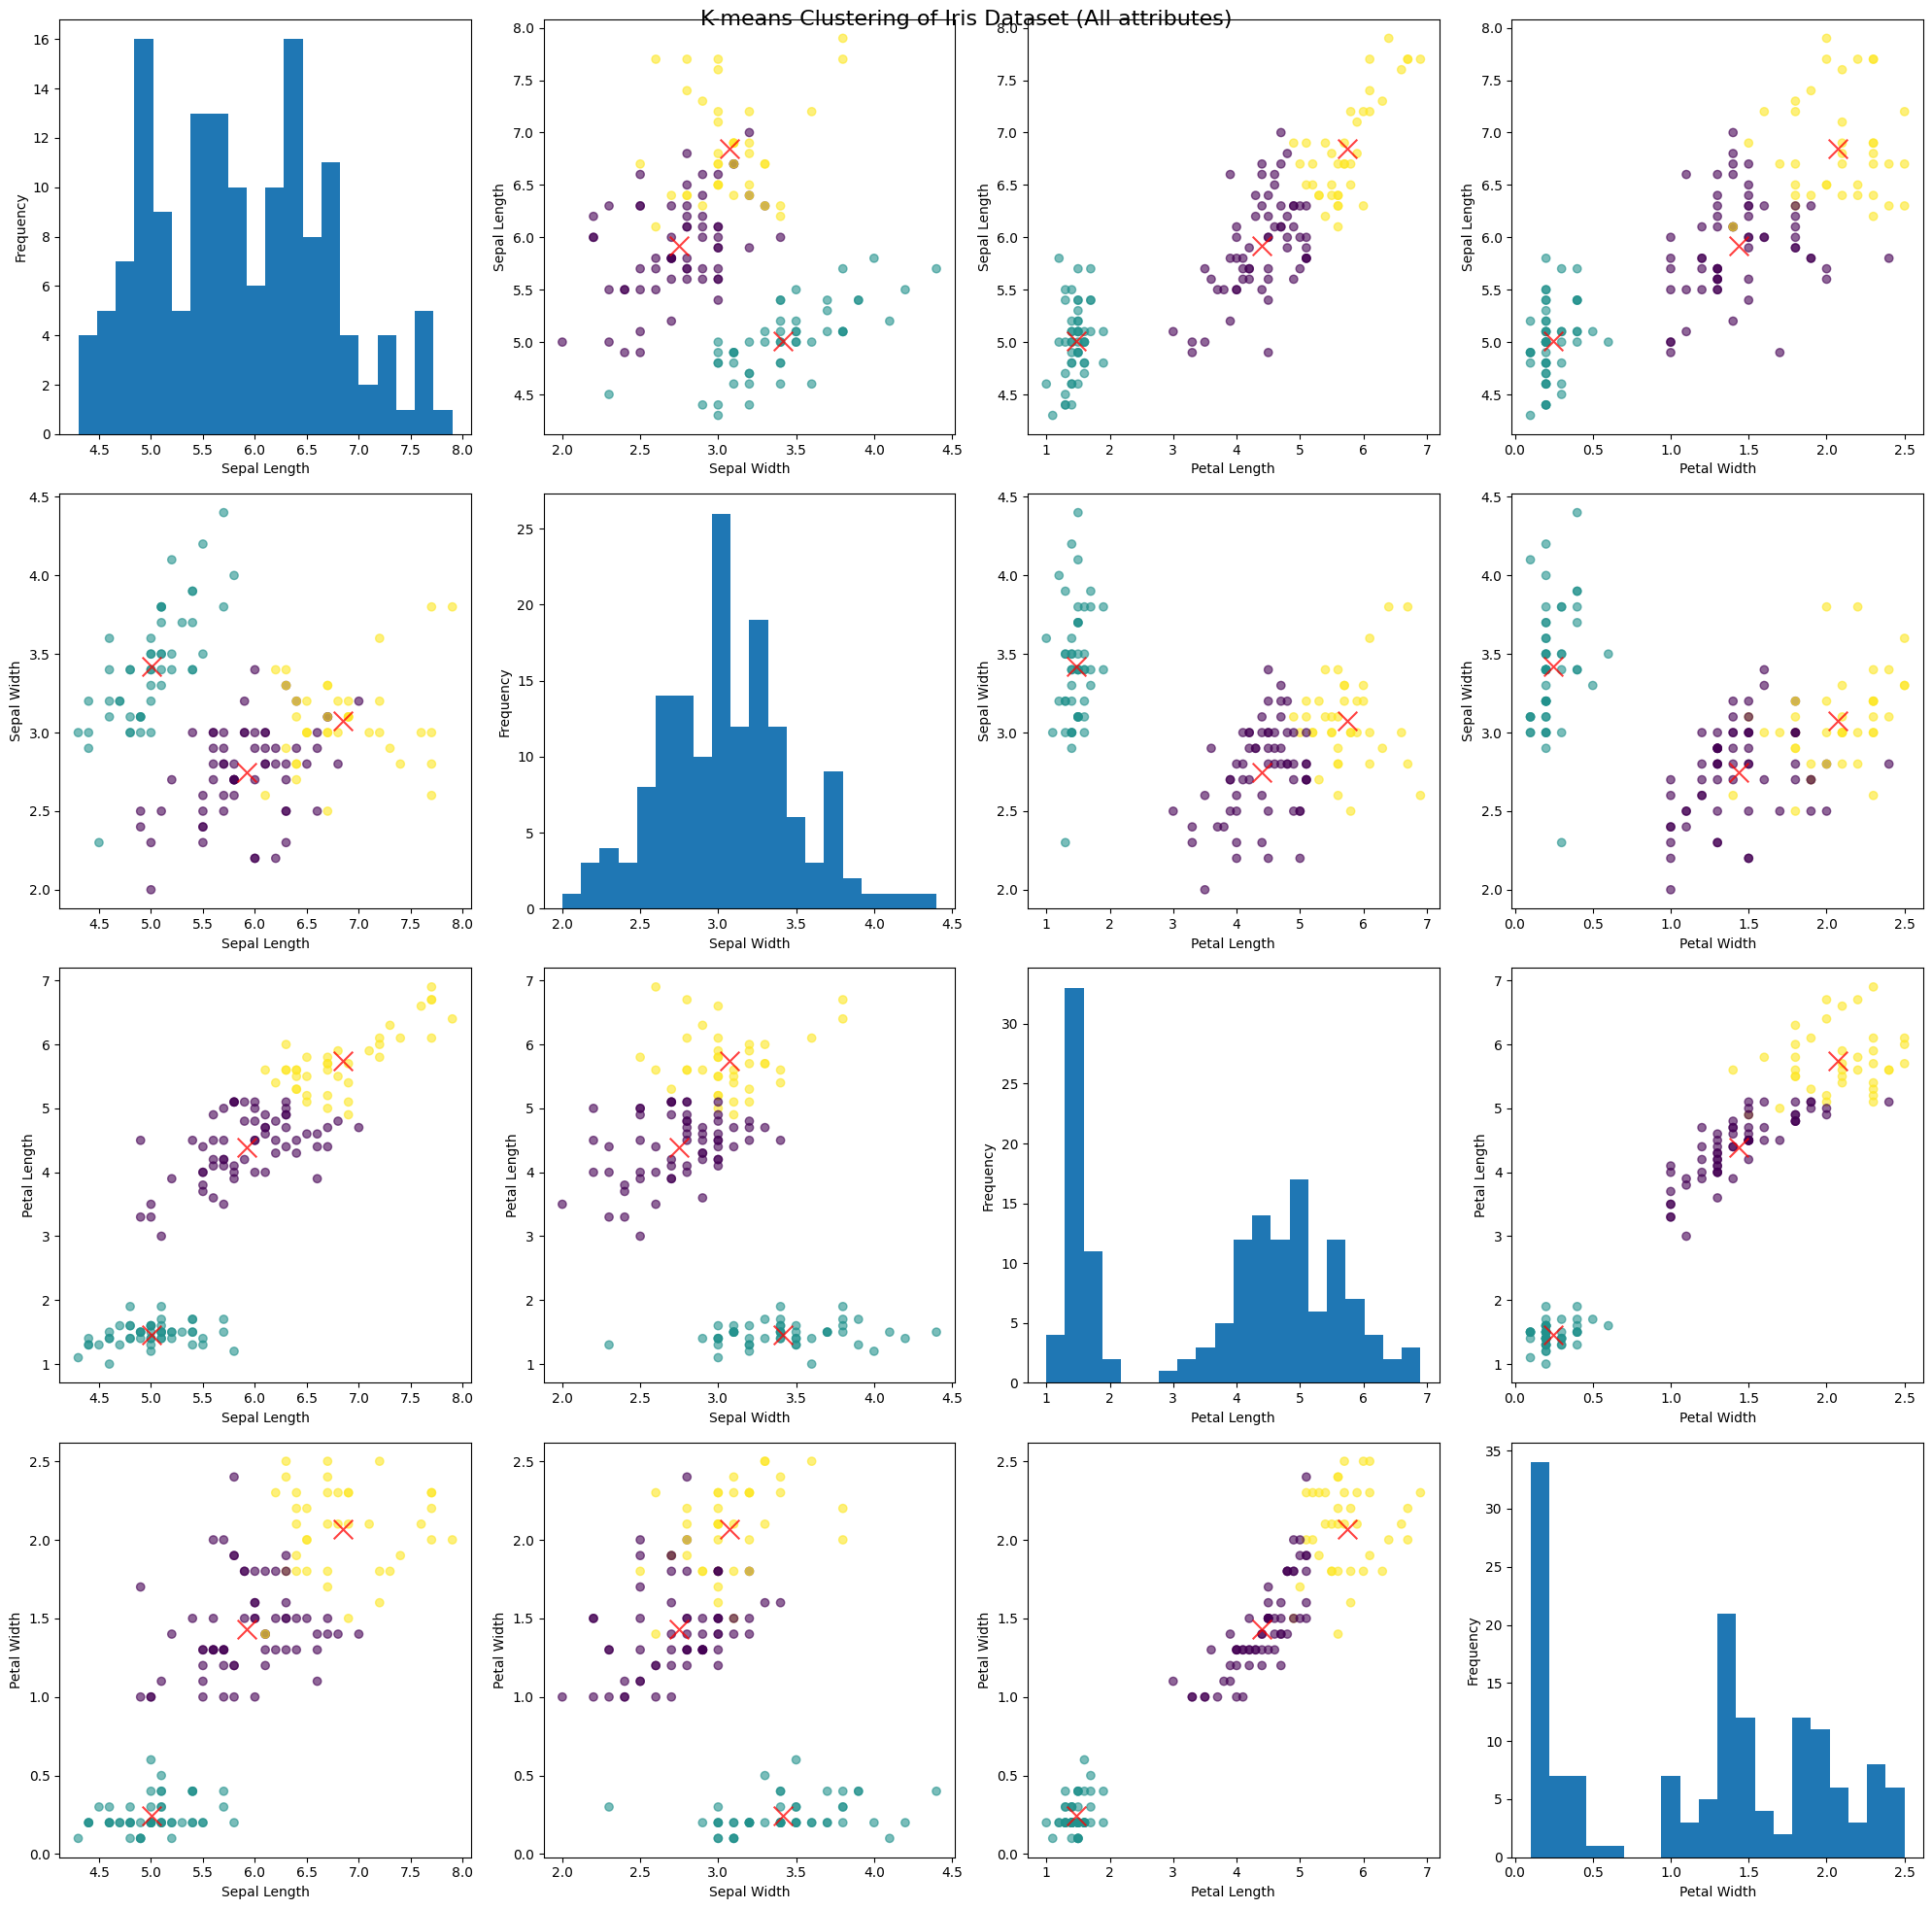

Cluster centroids:
Cluster 1: [5.91774194 2.7483871  4.39354839 1.43387097]
Cluster 2: [5.006 3.418 1.464 0.244]
Cluster 3: [6.85       3.07368421 5.74210526 2.07105263]

Inertia: 79.32


In [5]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data from the file
data = np.loadtxt('iris.txt', delimiter=',', usecols=(0, 1, 2, 3))

# Perform k-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis')

# Plot the centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
           c='red', s=200, alpha=0.75, marker='x')

# Set labels and title
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('K-means Clustering of Iris Dataset (3D projection)')

# Add a color bar
plt.colorbar(scatter)

# Show the plot
plt.show()

# Create a scatter plot matrix
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle('K-means Clustering of Iris Dataset (All attributes)', fontsize=16)

attributes = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

for i in range(4):
    for j in range(4):
        if i != j:
            axs[i, j].scatter(data[:, j], data[:, i], c=labels, cmap='viridis', alpha=0.6)
            axs[i, j].scatter(centroids[:, j], centroids[:, i], c='red', s=200, alpha=0.75, marker='x')
            axs[i, j].set_xlabel(attributes[j])
            axs[i, j].set_ylabel(attributes[i])
        else:
            axs[i, j].hist(data[:, i], bins=20)
            axs[i, j].set_xlabel(attributes[i])
            axs[i, j].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print the centroids
print("Cluster centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i + 1}: {centroid}")

# Calculate and print the sum of squared distances of samples to their closest cluster center
print(f"\nInertia: {kmeans.inertia_:.2f}")

## From Scratch


Cluster centroids:
Cluster 1: [-0.01342984 -0.8405927   0.34153121  0.26226423]
Cluster 2: [-1.02013047  0.84230679 -1.30487835 -1.25512862]
Cluster 3: [1.12460293 0.07123187 1.0174181  1.05639484]
Cluster centroids:
Cluster 1: [-0.03534835 -0.88029181  0.34753171  0.28206327]
Cluster 2: [-1.02013047  0.84230679 -1.30487835 -1.25512862]
Cluster 3: [1.12510608 0.09659843 0.996271   1.01717187]
Cluster centroids:
Cluster 1: [-0.03534835 -0.88029181  0.34753171  0.28206327]
Cluster 2: [-1.02013047  0.84230679 -1.30487835 -1.25512862]
Cluster 3: [1.12510608 0.09659843 0.996271   1.01717187]
Cluster to Species Mapping:
Cluster 0 -> Iris-versicolor
Cluster 1 -> Iris-setosa
Cluster 2 -> Iris-virginica

Confusion Matrix:
[[50  0  0]
 [ 0 39 11]
 [ 0 14 36]]

Clustering Accuracy: 0.83


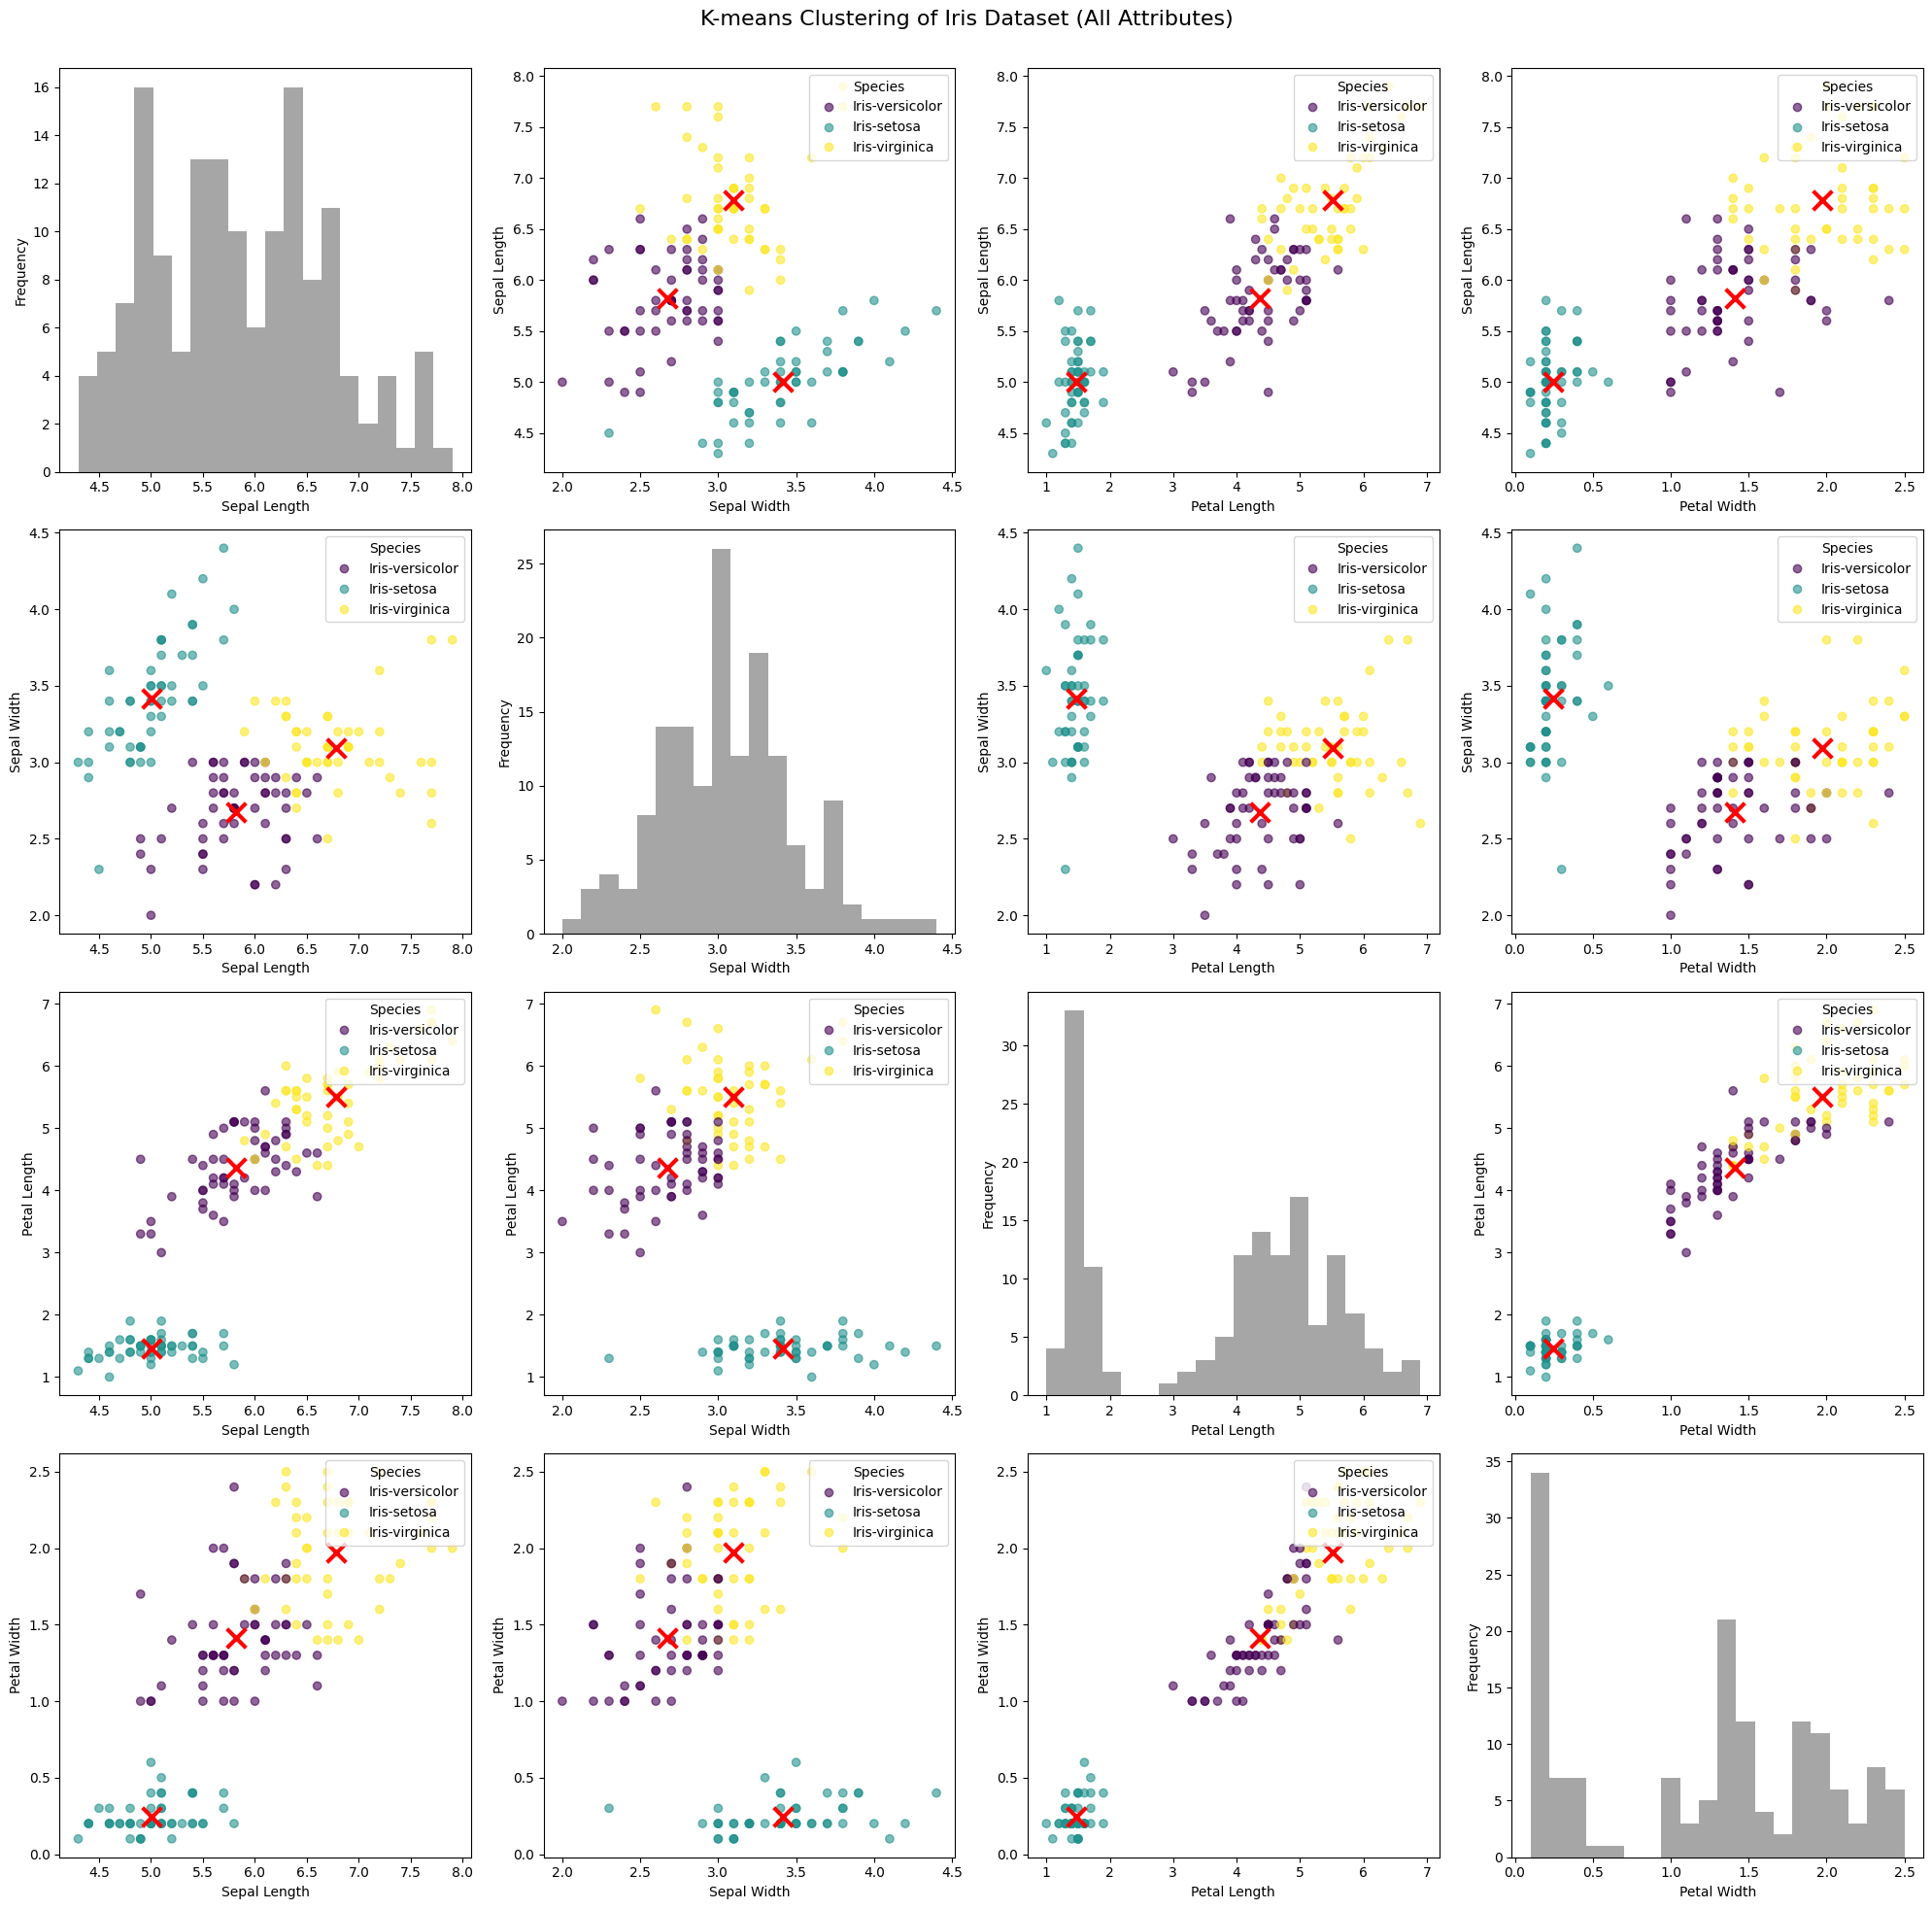

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import random

class KMeans:
    def __init__(self, n_clusters=3, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def euclidean(self, point, data):
        return np.sqrt(np.sum((point - data)**2, axis=1))

    def fit(self, X):
        # Initialize the centroids using the k-means++ method
        self.centroids = [random.choice(X)]
        for _ in range(self.n_clusters - 1):
            dists = np.sum([self.euclidean(centroid, X) for centroid in self.centroids], axis=0)
            dists /= np.sum(dists)
            new_centroid_idx, = np.random.choice(range(len(X)), size=1, p=dists)
            self.centroids += [X[new_centroid_idx]]

        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X:
                dists = self.euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) if cluster else prev_centroids[i] for i, cluster in enumerate(sorted_points)]
            iteration += 1

            # Print the centroids
            print("Cluster centroids:")
            for i, centroid in enumerate(self.centroids):
                print(f"Cluster {i + 1}: {centroid}")

            data = scaler.inverse_transform(X)
            cluster_assignments = kmeans.predict(X)
            centroids_o = scaler.inverse_transform(kmeans.centroids)
            #visualize_clusters(data, cluster_assignments, centroids_o)

    def predict(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = self.euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroid_idxs


def visualize_clusters(data, cluster_assignments, centroids_original, species):
    fig, axs = plt.subplots(4, 4, figsize=(20, 20))
    fig.suptitle('K-means Clustering of Iris Dataset (All Attributes)', fontsize=16)
    attributes = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

    for i in range(4):
        for j in range(4):
            if i != j:
                scatter = axs[i, j].scatter(data[:, j], data[:, i], c=cluster_assignments, cmap='viridis', alpha=0.6)
                axs[i, j].scatter(centroids_original[:, j], centroids_original[:, i],
                                  color='red', marker='x', s=200, linewidths=3)
                axs[i, j].set_xlabel(attributes[j])
                axs[i, j].set_ylabel(attributes[i])

                # Add legend
                handles, labels = scatter.legend_elements()
                legend = axs[i, j].legend(handles, species, loc="upper right", title="Species")
            else:
                axs[i, j].hist(data[:, i], bins=20, color='gray', alpha=0.7)
                axs[i, j].set_xlabel(attributes[i])
                axs[i, j].set_ylabel('Frequency')

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

def map_clusters_to_species(cluster_assignments, true_labels):
    cluster_to_species = {}
    for cluster in set(cluster_assignments):
        cluster_indices = np.where(cluster_assignments == cluster)[0]
        cluster_labels = true_labels[cluster_indices]
        most_common_species = max(set(cluster_labels), key=list(cluster_labels).count)
        cluster_to_species[cluster] = most_common_species
    return cluster_to_species

def evaluate_clustering(cluster_assignments, true_labels, cluster_to_species):
    predicted_labels = np.array([cluster_to_species[cluster] for cluster in cluster_assignments])
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    accuracy = accuracy_score(true_labels, predicted_labels)
    return conf_matrix, accuracy

# Load Iris data from iris.txt (including species names)
data = np.loadtxt('iris.txt', delimiter=',', usecols=(0, 1, 2, 3))
species = np.loadtxt('iris.txt', delimiter=',', usecols=(4), dtype=str)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Fit KMeans to scaled Iris dataset with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

# Get cluster assignments
cluster_assignments = kmeans.predict(X_scaled)

# Transform centroids back to original scale
centroids_original = scaler.inverse_transform(kmeans.centroids)

# Map clusters to species
cluster_to_species = map_clusters_to_species(cluster_assignments, species)

# Evaluate clustering
conf_matrix, accuracy = evaluate_clustering(cluster_assignments, species, cluster_to_species)

# Print results
print("Cluster to Species Mapping:")
for cluster, mapped_species in cluster_to_species.items():
    print(f"Cluster {cluster} -> {mapped_species}")

print("\nConfusion Matrix:")
print(conf_matrix)

print(f"\nClustering Accuracy: {accuracy:.2f}")

# Visualize the clusters
visualize_clusters(data, cluster_assignments, centroids_original, list(set(species)))